In [1]:
import numpy as np
from astropy.io import fits
import astropy.units as u
from IPython.display import clear_output
from pathlib import Path
from importlib import reload
import time
import os

import cupy as cp

import poppy
from poppy.poppy_core import PlaneType

import misc

# set debugging mode for more information from POPPY as propagation is performed
import logging, sys
poppy_log = logging.getLogger('poppy')
poppy_log.setLevel('DEBUG')
logging.basicConfig(stream=sys.stdout, level=logging.INFO)

poppy_log.disabled = False

poppy.conf.use_cupy = True

import poppy_optics
clear_output()
reload(poppy_optics)
from poppy_optics import *

DEBUG:poppy:Initialized: Primary, fl =5.52e+00 m
DEBUG:poppy:Initialized: Secondary, fl =-6.79e-01 m
DEBUG:poppy:Trans: fits-files/roman_pupil_309.fits
DEBUG:poppy:OPD: None
INFO:poppy:Roman Pupil: Loaded amplitude transmission from fits-files/roman_pupil_309.fits
DEBUG:poppy:  Getting pixel scale from user-provided float value: 0.007741935483870968
DEBUG:poppy:Trans: None
DEBUG:poppy:OPD: fits-files/roman_primary_opd_529.fits
DEBUG:poppy:No transmission supplied - will assume uniform throughput = 1 
INFO:poppy:Roman Primary OPD: Loaded OPD from fits-files/roman_primary_opd_529.fits
INFO:poppy:No info supplied on amplitude transmission; assuming uniform throughput = 1
DEBUG:poppy:  Getting pixel scale from user-provided float value: 0.004536862003780718
DEBUG:poppy:Trans: fits-files/roman_pupil_309.fits
DEBUG:poppy:OPD: fits-files/roman_primary_opd_309.fits
INFO:poppy:Roman Primary: Loaded amplitude transmission from fits-files/roman_pupil_309.fits
INFO:poppy:Roman Primary: Loaded OPD 

# Test all the optics with GPU by setting configuration for CuPy to True. 

# Test creating a fixed sampling optic for various defined elements.
Useful for debugging to ensure the amplitude/transmission and the OPD of an optic are calculated as expected. 

DEBUG:poppy:Converting Circle, radius=1.2 m to fixed sampling with grid_size=9.6 m, npix=1024, oversample=4
DEBUG:poppy:retrieving oversampled opd and transmission arrays
INFO:poppy:Computing opd for Circle, radius=1.2 m sampled onto 4096 pixel grid with pixelscale 0.00234375 m / pix
INFO:poppy:Computing amplitude for Circle, radius=1.2 m sampled onto 4096 pixel grid with pixelscale 0.00234375 m / pix
DEBUG:poppy:binning down opd and transmission arrays


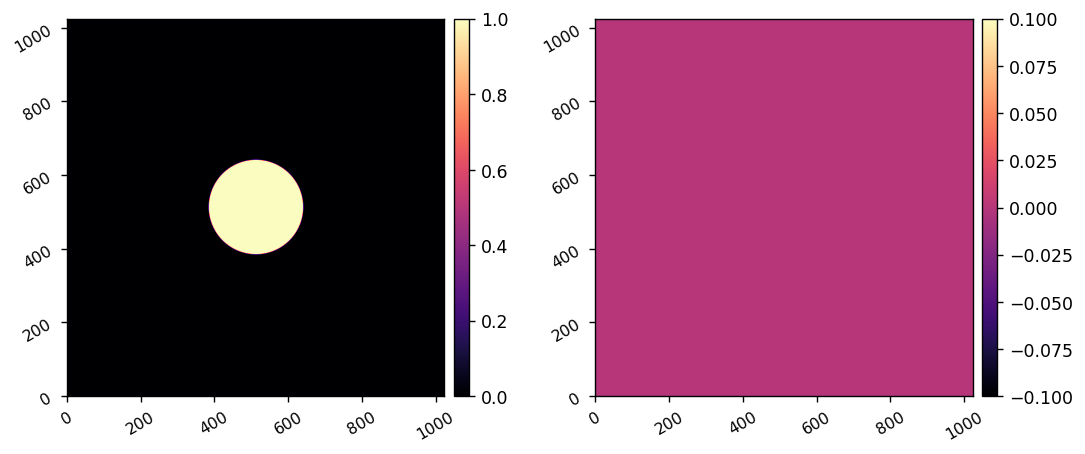

DEBUG:poppy:Converting multiCirc to fixed sampling with grid_size=9.6 m, npix=1024, oversample=4
DEBUG:poppy:retrieving oversampled opd and transmission arrays
INFO:poppy:Computing opd for multiCirc sampled onto 4096 pixel grid with pixelscale 0.00234375 m / pix
INFO:poppy:Computing amplitude for multiCirc sampled onto 4096 pixel grid with pixelscale 0.00234375 m / pix
DEBUG:poppy:binning down opd and transmission arrays


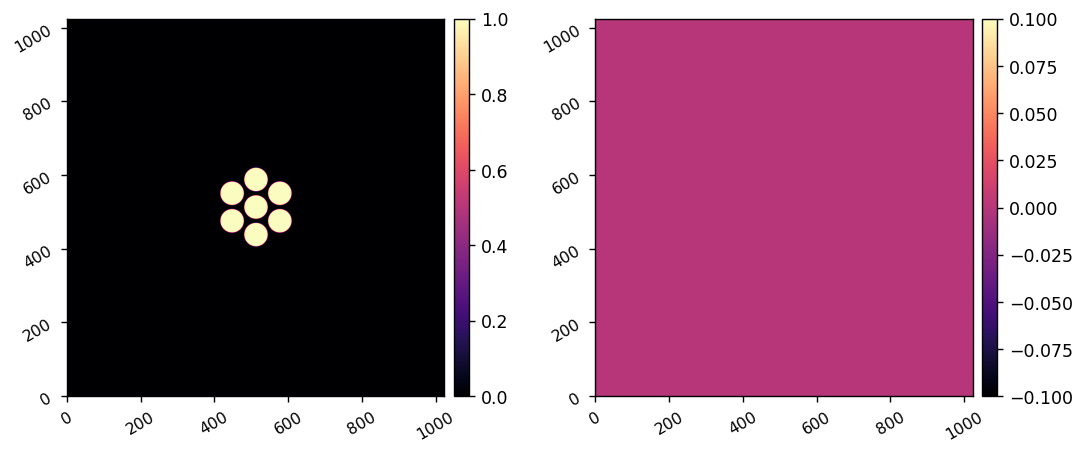

DEBUG:poppy:Converting Rectangle, size= 2.4 m wide * 1.2 m high to fixed sampling with grid_size=9.6 m, npix=1024, oversample=4
DEBUG:poppy:retrieving oversampled opd and transmission arrays
INFO:poppy:Computing opd for Rectangle, size= 2.4 m wide * 1.2 m high sampled onto 4096 pixel grid with pixelscale 0.00234375 m / pix
INFO:poppy:Computing amplitude for Rectangle, size= 2.4 m wide * 1.2 m high sampled onto 4096 pixel grid with pixelscale 0.00234375 m / pix
DEBUG:poppy:binning down opd and transmission arrays


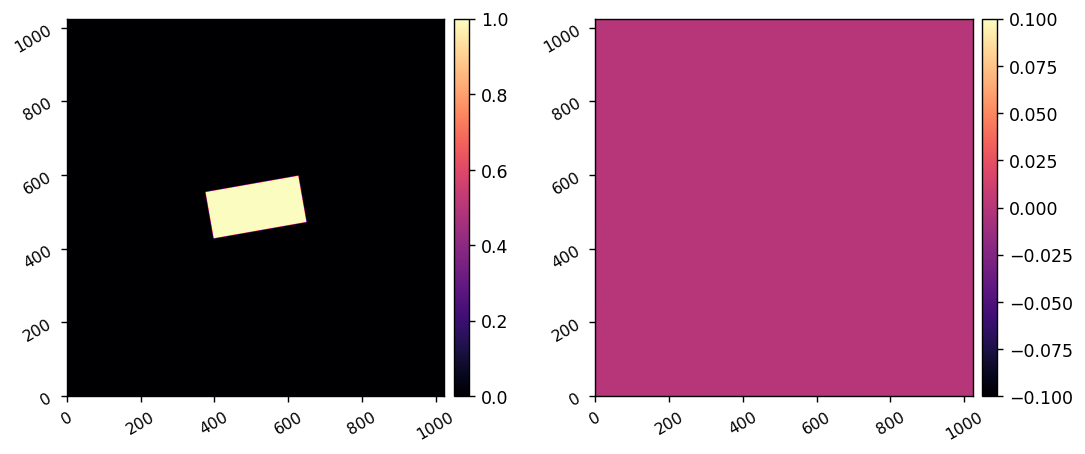

DEBUG:poppy:Converting Hexagon, side length= 1.2 m to fixed sampling with grid_size=9.6 m, npix=1024, oversample=4
DEBUG:poppy:retrieving oversampled opd and transmission arrays
INFO:poppy:Computing opd for Hexagon, side length= 1.2 m sampled onto 4096 pixel grid with pixelscale 0.00234375 m / pix
INFO:poppy:Computing amplitude for Hexagon, side length= 1.2 m sampled onto 4096 pixel grid with pixelscale 0.00234375 m / pix
DEBUG:poppy:binning down opd and transmission arrays


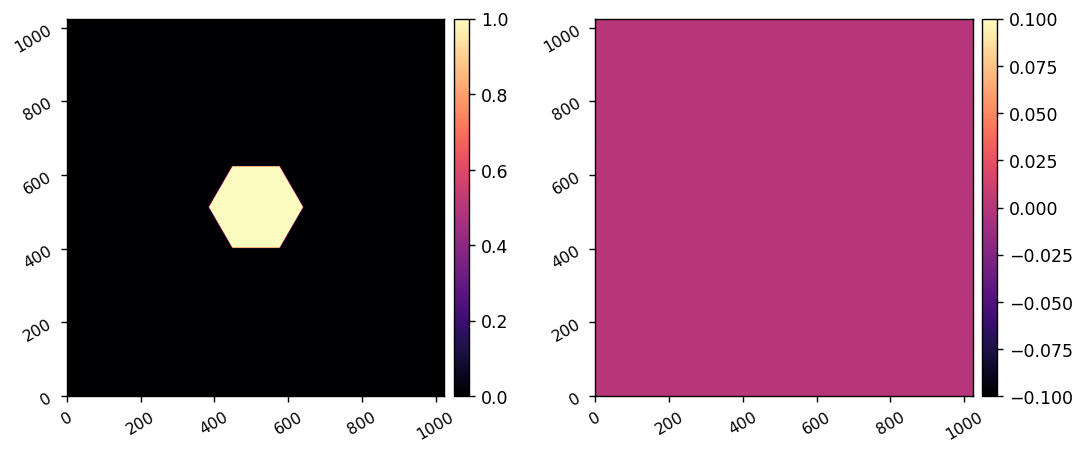

DEBUG:poppy:Converting MultiHex to fixed sampling with grid_size=9.6 m, npix=1024, oversample=4
DEBUG:poppy:retrieving oversampled opd and transmission arrays
INFO:poppy:Computing opd for MultiHex sampled onto 4096 pixel grid with pixelscale 0.00234375 m / pix
INFO:poppy:Computing amplitude for MultiHex sampled onto 4096 pixel grid with pixelscale 0.00234375 m / pix
DEBUG:poppy:binning down opd and transmission arrays


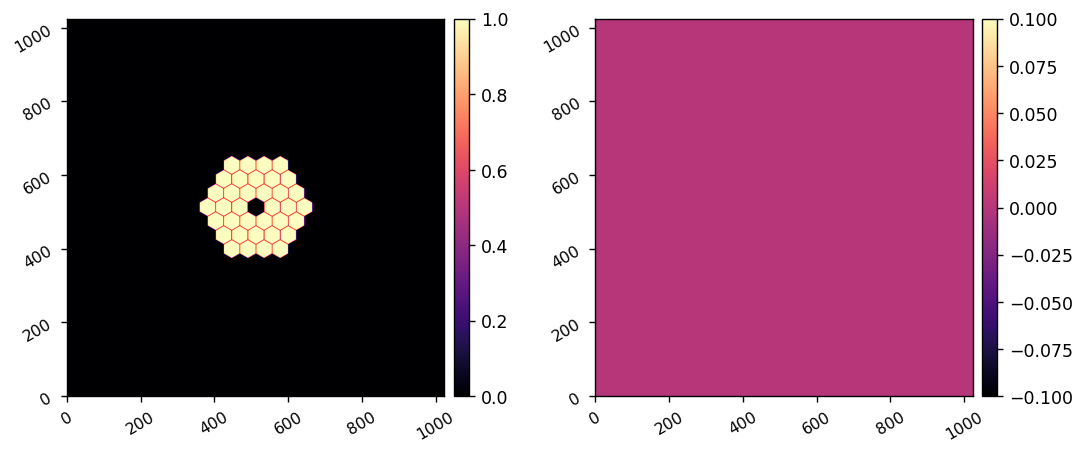

DEBUG:poppy:Converting Secondary Obscuration with 4 supports to fixed sampling with grid_size=9.6 m, npix=1024, oversample=4
DEBUG:poppy:retrieving oversampled opd and transmission arrays
INFO:poppy:Computing opd for Secondary Obscuration with 4 supports sampled onto 4096 pixel grid with pixelscale 0.00234375 m / pix
INFO:poppy:Computing amplitude for Secondary Obscuration with 4 supports sampled onto 4096 pixel grid with pixelscale 0.00234375 m / pix
DEBUG:poppy:binning down opd and transmission arrays


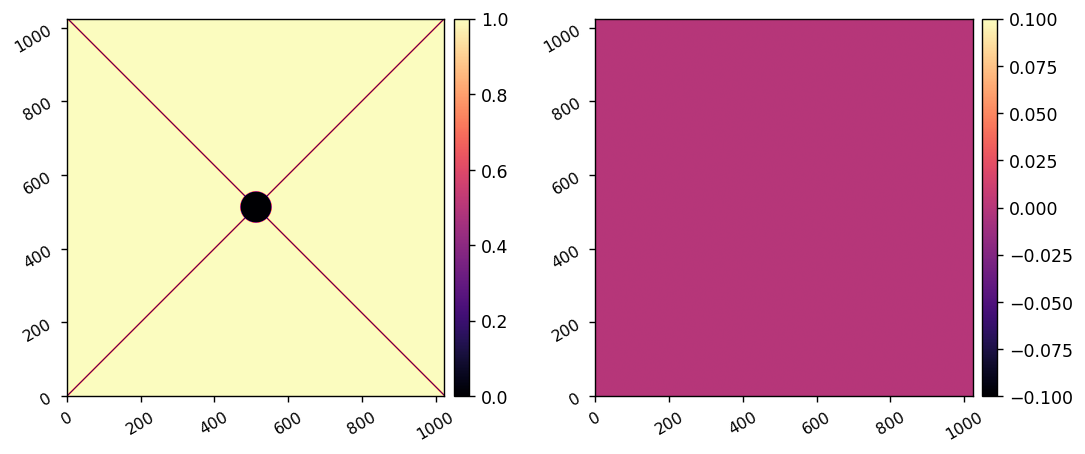

DEBUG:poppy:Converting Secondary Obscuration with 3 supports to fixed sampling with grid_size=9.6 m, npix=1024, oversample=4
DEBUG:poppy:retrieving oversampled opd and transmission arrays
INFO:poppy:Computing opd for Secondary Obscuration with 3 supports sampled onto 4096 pixel grid with pixelscale 0.00234375 m / pix
INFO:poppy:Computing amplitude for Secondary Obscuration with 3 supports sampled onto 4096 pixel grid with pixelscale 0.00234375 m / pix
DEBUG:poppy:binning down opd and transmission arrays


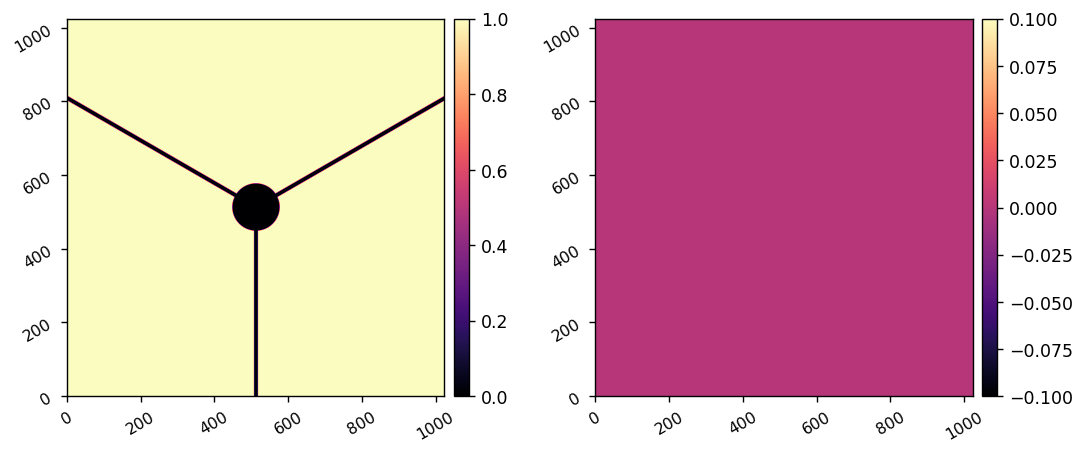

DEBUG:poppy:Converting unnamed to fixed sampling with grid_size=9.6 m, npix=1024, oversample=4
DEBUG:poppy:retrieving oversampled opd and transmission arrays
INFO:poppy:Computing opd for unnamed sampled onto 4096 pixel grid with pixelscale 0.00234375 m / pix
INFO:poppy:Computing amplitude for unnamed sampled onto 4096 pixel grid with pixelscale 0.00234375 m / pix
DEBUG:poppy:binning down opd and transmission arrays


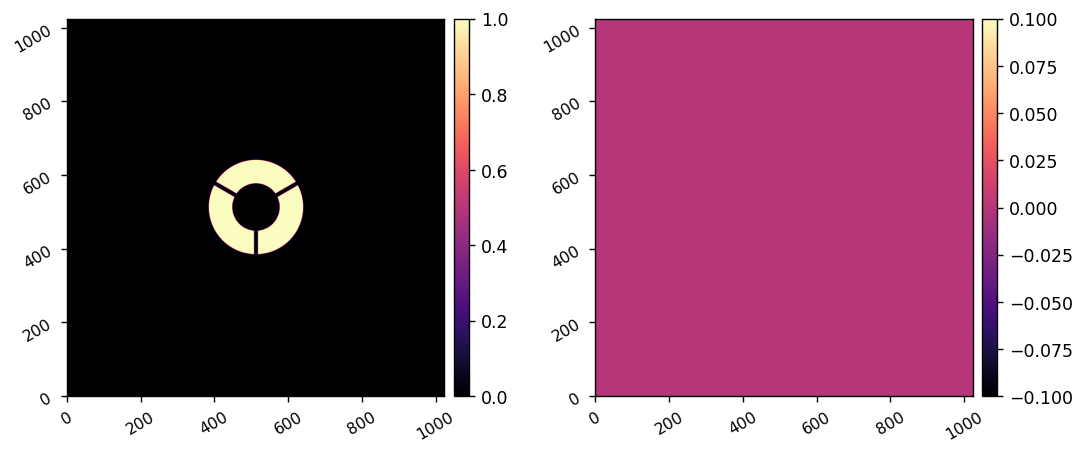

DEBUG:poppy:Converting Primary to fixed sampling with grid_size=9.6 m, npix=1024, oversample=4
DEBUG:poppy:retrieving oversampled opd and transmission arrays
INFO:poppy:Computing opd for Primary sampled onto 4096 pixel grid with pixelscale 0.00234375 m / pix
DEBUG:poppy:Applying spherical phase curvature =5.52e+00 m
DEBUG:poppy:Applying spherical lens phase =1.81e-01 1 / m
INFO:poppy:Computing amplitude for Primary sampled onto 4096 pixel grid with pixelscale 0.00234375 m / pix
DEBUG:poppy:binning down opd and transmission arrays


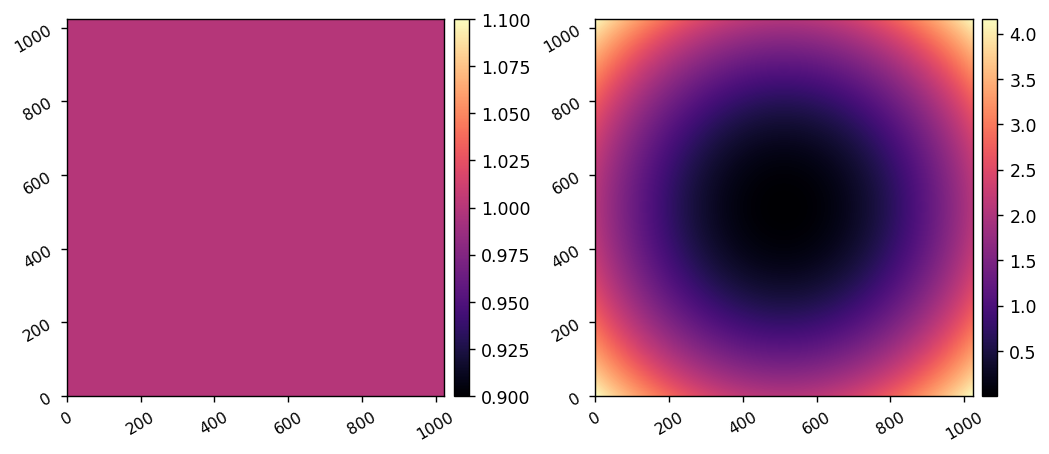

DEBUG:poppy:Converting Thin lens to fixed sampling with grid_size=9.6 m, npix=1024, oversample=4
DEBUG:poppy:retrieving oversampled opd and transmission arrays
INFO:poppy:Computing opd for Thin lens sampled onto 4096 pixel grid with pixelscale 0.00234375 m / pix
INFO:poppy:Computing amplitude for Thin lens sampled onto 4096 pixel grid with pixelscale 0.00234375 m / pix
DEBUG:poppy:binning down opd and transmission arrays


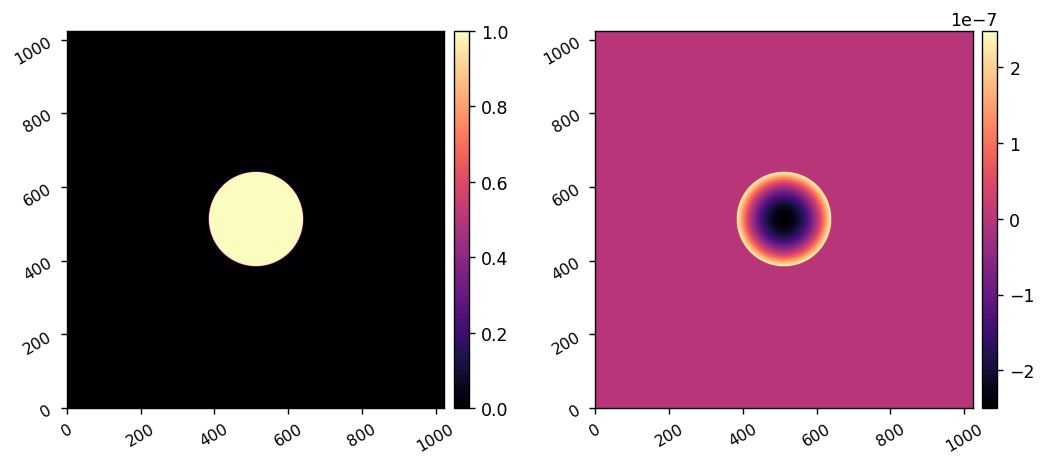

DEBUG:poppy:Converting Gaussian aperture with fwhm =1.20 m to fixed sampling with grid_size=9.6 m, npix=1024, oversample=4
DEBUG:poppy:retrieving oversampled opd and transmission arrays
INFO:poppy:Computing opd for Gaussian aperture with fwhm =1.20 m sampled onto 4096 pixel grid with pixelscale 0.00234375 m / pix
INFO:poppy:Computing amplitude for Gaussian aperture with fwhm =1.20 m sampled onto 4096 pixel grid with pixelscale 0.00234375 m / pix
DEBUG:poppy:binning down opd and transmission arrays


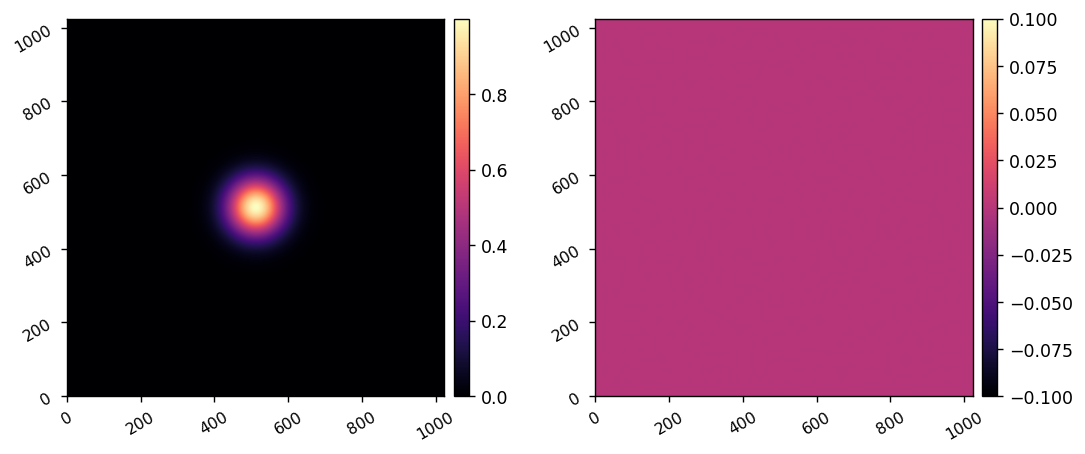

DEBUG:poppy:Converting Zernike WFE to fixed sampling with grid_size=9.6 m, npix=1024, oversample=4
DEBUG:poppy:retrieving oversampled opd and transmission arrays
INFO:poppy:Computing opd for Zernike WFE sampled onto 4096 pixel grid with pixelscale 0.00234375 m / pix
INFO:poppy:Computing amplitude for Zernike WFE sampled onto 4096 pixel grid with pixelscale 0.00234375 m / pix
DEBUG:poppy:binning down opd and transmission arrays


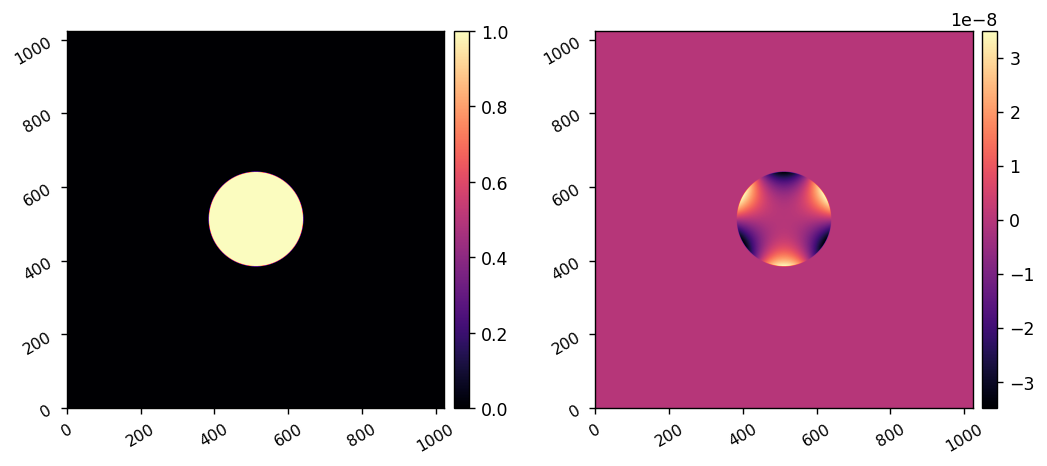

DEBUG:poppy:Converting Kolmogorov WFE to fixed sampling with grid_size=9.6 m, npix=1024, oversample=4
DEBUG:poppy:retrieving oversampled opd and transmission arrays
INFO:poppy:Computing opd for Kolmogorov WFE sampled onto 4096 pixel grid with pixelscale 0.00234375 m / pix
INFO:poppy:Computing amplitude for Kolmogorov WFE sampled onto 4096 pixel grid with pixelscale 0.00234375 m / pix
DEBUG:poppy:binning down opd and transmission arrays


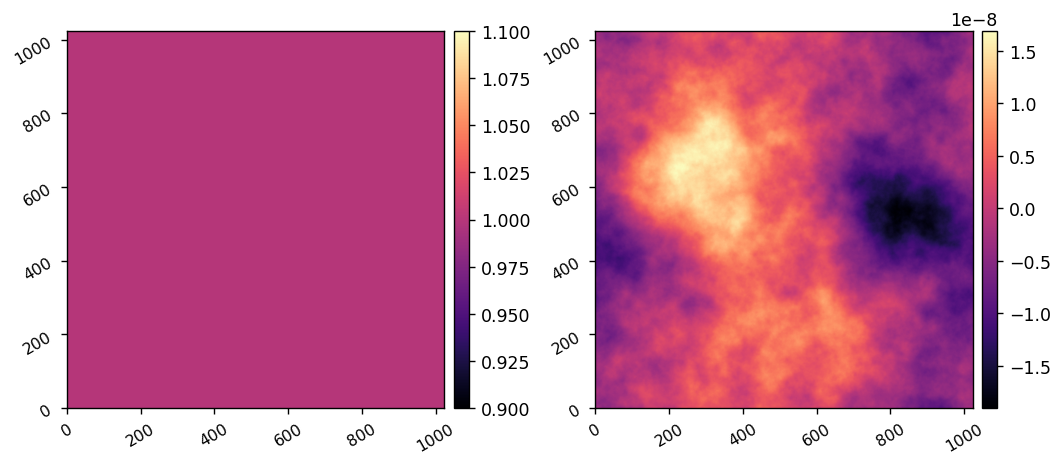

DEBUG:poppy:Converting PSD WFE to fixed sampling with grid_size=9.6 m, npix=1024, oversample=4
DEBUG:poppy:retrieving oversampled opd and transmission arrays
INFO:poppy:Computing opd for PSD WFE sampled onto 4096 pixel grid with pixelscale 0.00234375 m / pix
INFO:poppy:Computing amplitude for PSD WFE sampled onto 4096 pixel grid with pixelscale 0.00234375 m / pix
DEBUG:poppy:binning down opd and transmission arrays


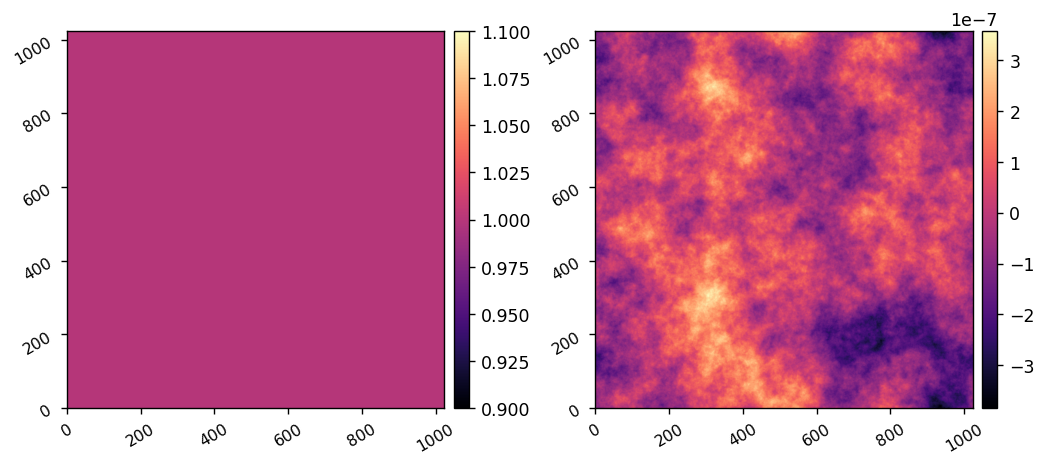

In [2]:
reload(poppy_optics)
from poppy_optics import *
clear_output()

array_optic = poppy.fixed_sampling_optic(circ_pupil, fwf, oversample)
misc.myimshow2(array_optic.amplitude, array_optic.opd)

array_optic = poppy.fixed_sampling_optic(multi_circ_pupil, fwf, oversample)
misc.myimshow2(array_optic.amplitude, array_optic.opd)

array_optic = poppy.fixed_sampling_optic(rect_pupil, fwf, oversample)
misc.myimshow2(array_optic.amplitude, array_optic.opd)

array_optic = poppy.fixed_sampling_optic(hex_pupil_side, fwf, oversample)
misc.myimshow2(array_optic.amplitude, array_optic.opd)

array_optic = poppy.fixed_sampling_optic(multi_hex_pupil_flat, fwf, oversample)
misc.myimshow2(array_optic.amplitude, array_optic.opd)

array_optic = poppy.fixed_sampling_optic(sec_obs, fwf, oversample)
misc.myimshow2(array_optic.amplitude, array_optic.opd)

array_optic = poppy.fixed_sampling_optic(asym_sec_obs, fwf, oversample)
misc.myimshow2(array_optic.amplitude, array_optic.opd)

array_optic = poppy.fixed_sampling_optic(compound_pupil, fwf, oversample)
misc.myimshow2(array_optic.amplitude, array_optic.opd)

array_optic = poppy.fixed_sampling_optic(m1, fwf, oversample)
misc.myimshow2(array_optic.amplitude, array_optic.opd)

array_optic = poppy.fixed_sampling_optic(thin_lens, fwf, oversample)
misc.myimshow2(array_optic.amplitude, array_optic.opd)

array_optic = poppy.fixed_sampling_optic(gauss_ap, fwf, oversample)
misc.myimshow2(array_optic.amplitude, array_optic.opd)

array_optic = poppy.fixed_sampling_optic(zern_wfe, fwf, oversample)
misc.myimshow2(array_optic.amplitude, array_optic.opd)

array_optic = poppy.fixed_sampling_optic(kol_wfe, fwf, oversample)
misc.myimshow2(array_optic.amplitude, array_optic.opd)

array_optic = poppy.fixed_sampling_optic(psd_wfe, fwf, oversample)
misc.myimshow2(array_optic.amplitude, array_optic.opd)

# Test the use of Deformable Mirrors.

DEBUG:poppy:Converting DM to fixed sampling with grid_size=0.1901952 m, npix=1024, oversample=4
DEBUG:poppy:retrieving oversampled opd and transmission arrays
INFO:poppy:Computing opd for DM sampled onto 4096 pixel grid with pixelscale 4.6434375e-05 m / pix
INFO:poppy:Computing amplitude for DM sampled onto 4096 pixel grid with pixelscale 4.6434375e-05 m / pix
DEBUG:poppy:binning down opd and transmission arrays


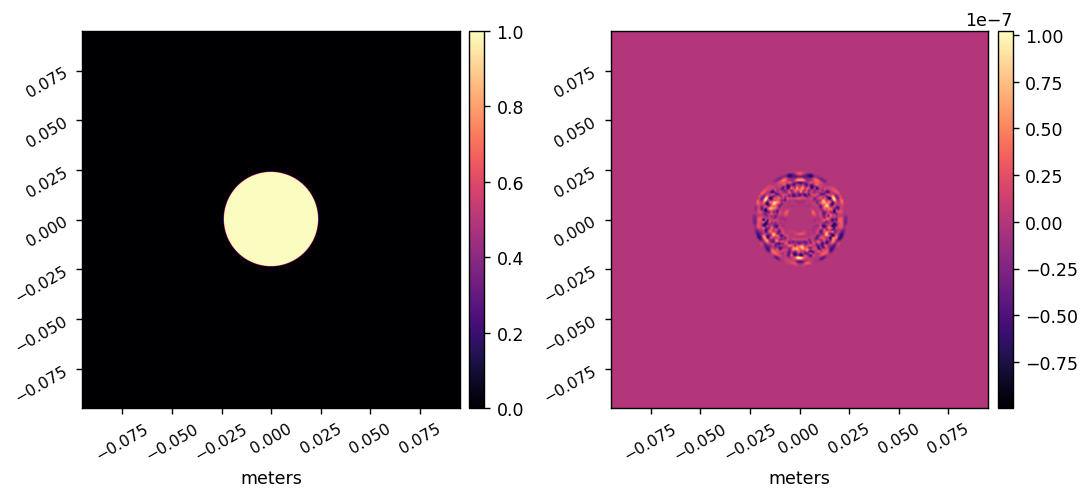

DEBUG:poppy:Converting CircSegDM to fixed sampling with grid_size=0.1901952 m, npix=1024, oversample=2
DEBUG:poppy:retrieving oversampled opd and transmission arrays
INFO:poppy:Computing opd for CircSegDM sampled onto 2048 pixel grid with pixelscale 9.286875e-05 m / pix
INFO:poppy:Computing amplitude for CircSegDM sampled onto 2048 pixel grid with pixelscale 9.286875e-05 m / pix
DEBUG:poppy:binning down opd and transmission arrays


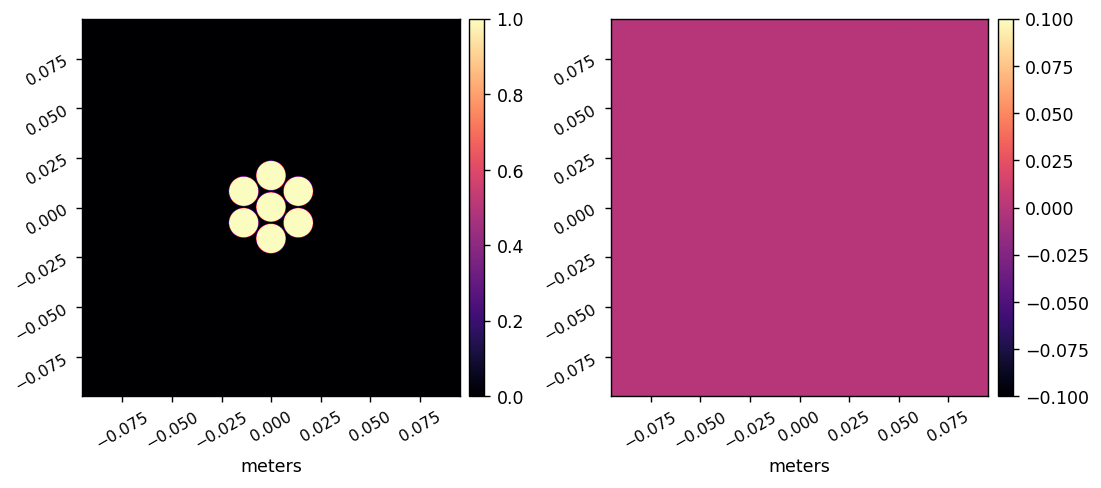

DEBUG:poppy:Converting HexDM to fixed sampling with grid_size=0.1901952 m, npix=1024, oversample=2
DEBUG:poppy:retrieving oversampled opd and transmission arrays
INFO:poppy:Computing opd for HexDM sampled onto 2048 pixel grid with pixelscale 9.286875e-05 m / pix
INFO:poppy:Computing amplitude for HexDM sampled onto 2048 pixel grid with pixelscale 9.286875e-05 m / pix
DEBUG:poppy:binning down opd and transmission arrays


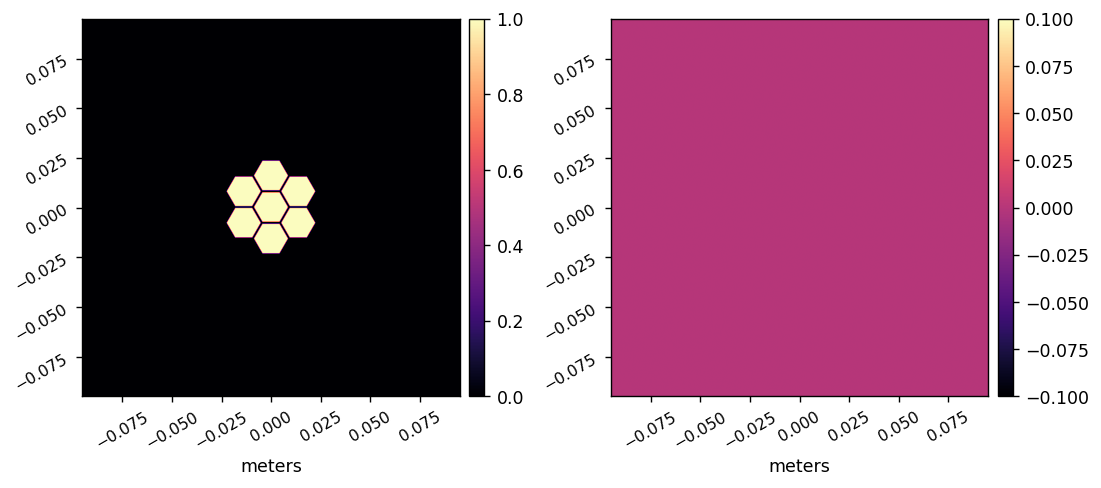

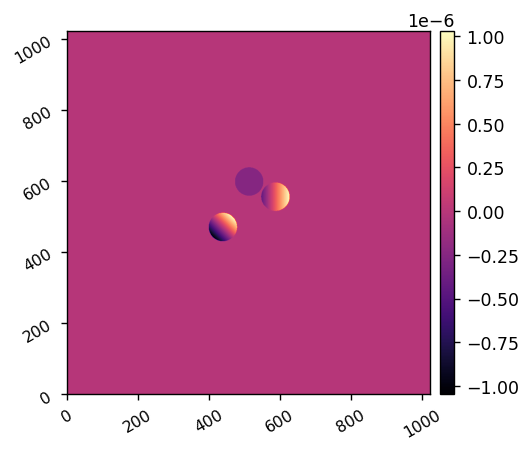

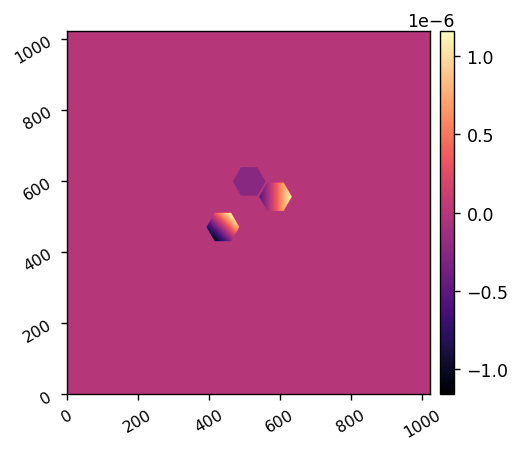

In [11]:
# Deformable Mirror Tests
array_optic = poppy.fixed_sampling_optic(DM, fwf_dm, oversample)
misc.myimshow2(array_optic.amplitude, array_optic.opd, 
               pxscl1=array_optic.pixelscale, pxscl2=array_optic.pixelscale)

array_optic = poppy.fixed_sampling_optic(circ_seg_DM, fwf_dm)
misc.myimshow2(array_optic.amplitude, array_optic.opd, 
               pxscl1=array_optic.pixelscale, pxscl2=array_optic.pixelscale)

array_optic = poppy.fixed_sampling_optic(hex_seg_DM, fwf_dm)
misc.myimshow2(array_optic.amplitude, array_optic.opd, 
               pxscl1=array_optic.pixelscale, pxscl2=array_optic.pixelscale)

circ_seg_DM.set_actuator(1, -2.5e-7, 0, 0)
circ_seg_DM.set_actuator(2, 3e-7, 0.1*u.milliradian, 0)
circ_seg_DM.set_actuator(5, 0, 0.1*u.milliradian, 0.1*u.milliradian)

opd = circ_seg_DM.get_opd(fwf_dm)
misc.myimshow(opd)

hex_seg_DM.set_actuator(1, -2.5e-7, 0, 0)
hex_seg_DM.set_actuator(2, 3e-7, 0.1*u.milliradian, 0)
hex_seg_DM.set_actuator(5, 0, 0.1*u.milliradian, 0.1*u.milliradian)

opd = hex_seg_DM.get_opd(fwf_dm)
misc.myimshow(opd)

# Create the FresnelOpticalSystem and calculate a PSF. 
A variety of optics can be added by just commenting out or uncommenting some lines. This is useful for testing each optic in an actual system to make sure it functions as expected during propagation. 

In [7]:
poppy.conf.use_cupy = True
# reload(poppy.fresnel)
# reload(poppy.geometry)
# reload(poppy.optics)
# reload(poppy)

INFO:poppy:Added optic: Circle, radius=1.2 m after separation: 0.00e+00 m 
INFO:poppy:Added optic: Model PSD WFE after separation: 0.00e+00 m 
INFO:poppy:Added optic: Primary after separation: 0.00e+00 m 
INFO:poppy:Added optic: Secondary after separation: 4.91e+00 m 
INFO:poppy:Added optic: Focus after separation: 6.39e+00 m 
INFO:poppy:Calculating PSF with 1 wavelengths
INFO:poppy:User requested saving intermediate wavefronts in call to poppy.calc_psf
DEBUG:poppy:Already loaded wisdom prior to this calculation, not reloading.
INFO:poppy: Propagating wavelength = 5e-07 m
DEBUG:poppy:Padded WF array for oversampling by 4.000, to (1024, 1024).
DEBUG:poppy:Input wavefront has wavelength=0.5 microns, npix=256, diam=2.4 m, pixel scale=0.009375 m / pix
DEBUG:poppy:  Propagating wavefront to Optic: Circle, radius=1.2 m after distance 0.0 m 
DEBUG:poppy:  Multiplied WF by phasor for Optic: Circle, radius=1.2 m
DEBUG:poppy:normalizing at first plane (entrance pupil) to 1.0 total intensity
DEBU

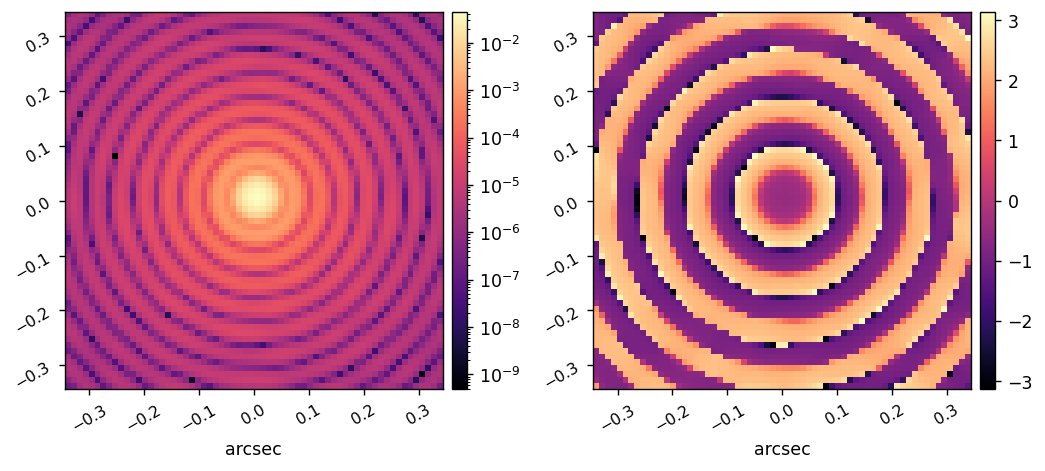

In [18]:
reload(poppy_optics)
from poppy_optics import *
clear_output()

# Add the pupil optic(s)
fosys.add_optic(circ_pupil)
# fosys.add_optic(multi_circ_pupil)
# fosys.add_optic(rect_pupil)
# fosys.add_optic(square_pupil)
# fosys.add_optic(hex_pupil_side)
# fosys.add_optic(hex_pupil_flat)
# fosys.add_optic(multi_hex_pupil_side)
# fosys.add_optic(multi_hex_pupil_flat)
# fosys.add_optic(ngon_pupil)
# fosys.add_optic(sec_obs)
# fosys.add_optic(asym_sec_obs)
# fosys.add_optic(compound_pupil)

# fosys.add_optic(rpupil_array)
# fosys.add_optic(rprimary_opd_array)
# fosys.add_optic(rpupil_opd_array)
# fosys.add_optic(rpupil); fosys.add_optic(rprimary_opd)
# fosys.add_optic(rpupil_opd)

# Add a miscellaneous optic for testing
# fosys.add_optic(thin_lens)
# fosys.add_optic(gauss_ap)
# fosys.add_optic(knife_edge)
# fosys.add_optic(inv_circ)
# fosys.add_optic(scalar_opd)

# Add WFE optic for testing
# fosys.add_optic(zern_wfe)
# fosys.add_optic(sin_wfe)
# fosys.add_optic(kol_wfe)
# fosys.add_optic(psd_wfe)
fosys.add_optic(power_spec_wfe)

fosys.add_optic(m1)
fosys.add_optic(m2, distance=d_pri_sec)
fosys.add_optic(angular_focal_plane, distance=d_sec_to_focus)
# fosys.add_detector(pixelscale=5e-6*u.m/u.pixel, fov_pixels=64*u.pixel, distance=d_sec_to_focus)

poppy_log.disabled = False

psf, wfs = fosys.calc_psf(wavelength=wavelength, return_intermediates=True)

misc.myimshow2(wfs[-1].intensity, wfs[-1].phase, npix=64, lognorm1=True,
               pxscl1=wfs[-1].pixelscale, pxscl2=wfs[-1].pixelscale)

# Show all waves

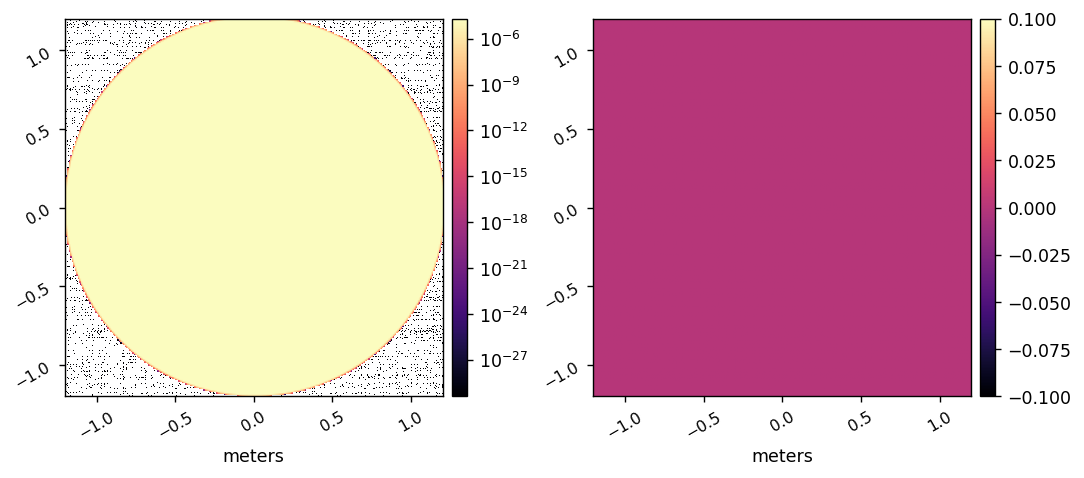

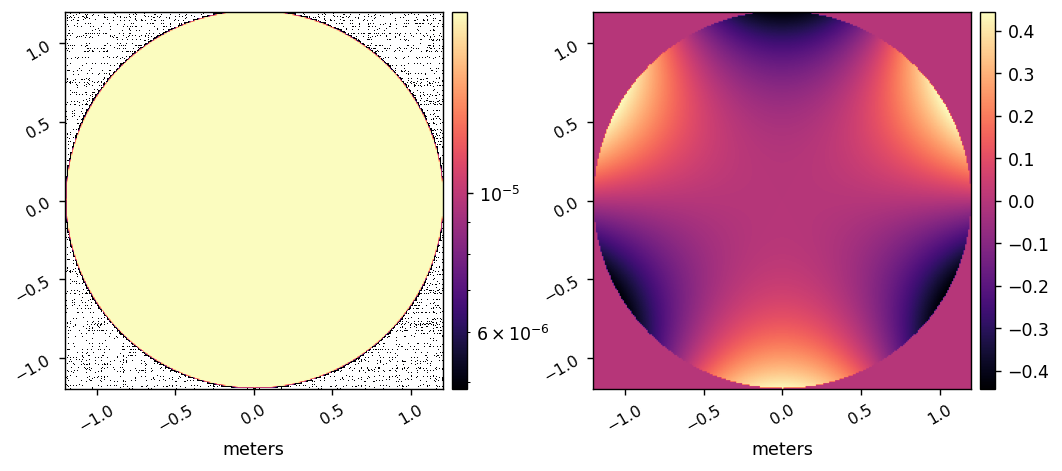

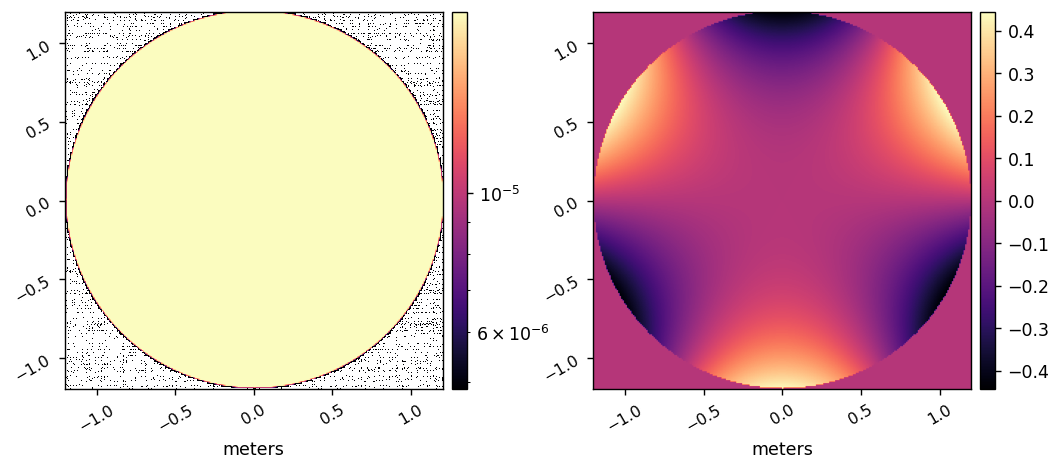

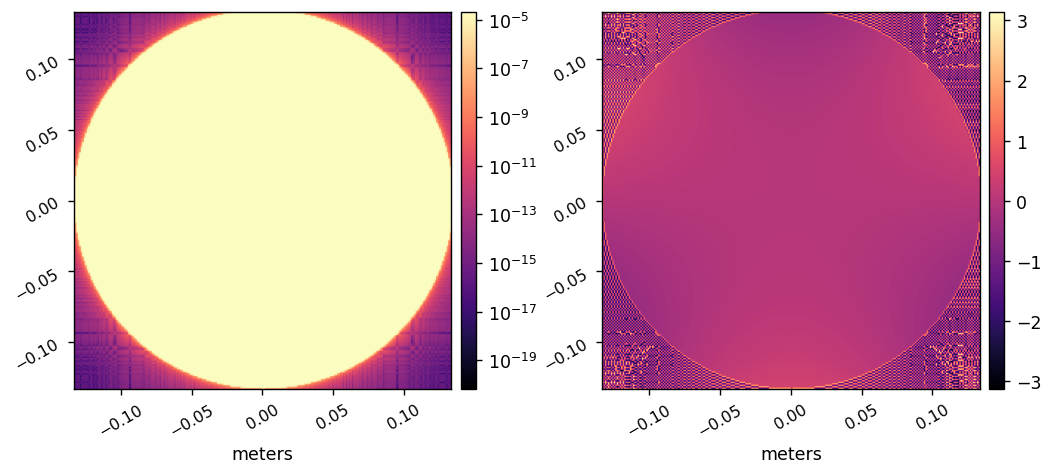

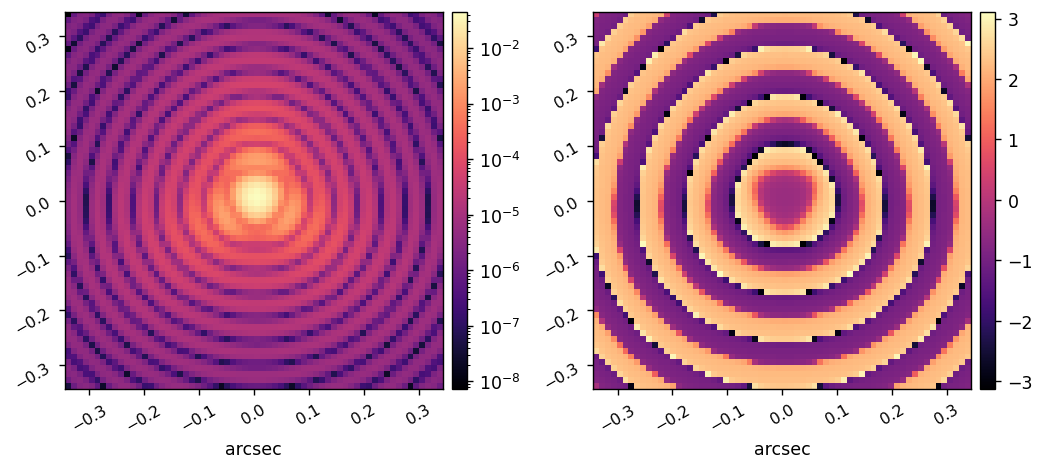

In [13]:
for i,wf in enumerate(wfs):
    if (i-len(wfs))==-1: n = 64
    else: n = npix
    misc.myimshow2(wf.intensity, wf.phase, npix=n, lognorm1=True,
                   pxscl1=wf.pixelscale, pxscl2=wf.pixelscale)